# Bessel Function

In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from scipy.special import jv # for bessel func


Goal: Study the first 3 Bessel Functions $J_n(x)$ for $n=1,2,3$ and compute the first 5 positive roots $J_{n,k}(x)$ where $k=1,2,3,4,5$.

$$J_n(x)=\frac{1}{\pi}\int_0^\pi \cos(x\sin\theta-n\theta)d\theta$$

for $n=0,1,2\dots$

Method used: evaluated $J_n(x)$ numerically using `scipy.special.jv` to implement the integral with max precision.

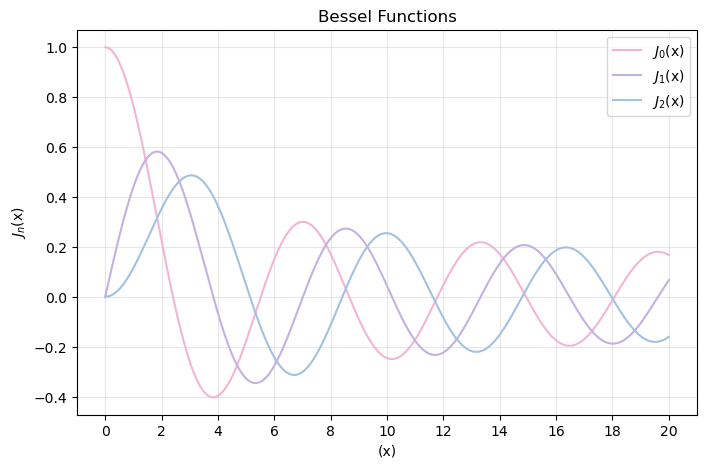

In [220]:
# define bessen function of order n
def J_n(x, n):
    return jv(n, x)

# plot J0(x), J1(x), J2(x) from x=0 to x=20

# range and orders
x = np.linspace(0, 20, 1000)
n = [0, 1, 2]

cute_colors = ['#F2B5D4', '#C3B1E1', '#A2C2E0']

plt.figure(figsize=(8,5))
for i in range(len(n)):
    plt.plot(x, J_n(x, n[i]), color=cute_colors[i], label=f'$J_{n[i]}$(x)')
plt.xlabel('(x)')
plt.ylabel('$J_n$(x)')
plt.title('Bessel Functions')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(np.arange(0, 21, 2))
plt.show()

In [221]:
# use fsolve to find the exact roots numerically                                                                                                                                                                                                          ']
guesses = {
    0: [2, 6.1, 8.6, 11.7, 15],
    1: [3.9, 7, 10.15, 13.1, 16.4],
    2: [5.1, 8.3, 11.8, 14.9, 18]
}

roots = {}
for order in n:
    r_n = []
    for guess in guesses[order]:
        root = fsolve(J_n, guess, args=(order,)) # find root near that guess
        r_n.append(float(root[0]))
    roots[order] = r_n

for n in roots:
    print(f'Roots for J_{n}(x):')
    for root in roots[n]:
        print(f'   {root:.6f}')

Roots for J_0(x):
   2.404826
   5.520078
   8.653728
   11.791534
   14.930918
Roots for J_1(x):
   3.831706
   7.015587
   10.173468
   13.323692
   16.470630
Roots for J_2(x):
   5.135622
   8.417244
   11.619841
   14.795952
   17.959819


Thus, we have found the first 5 positive roots of the Bessel Functions $J_0(x), J_1(x), J_2(x)$.

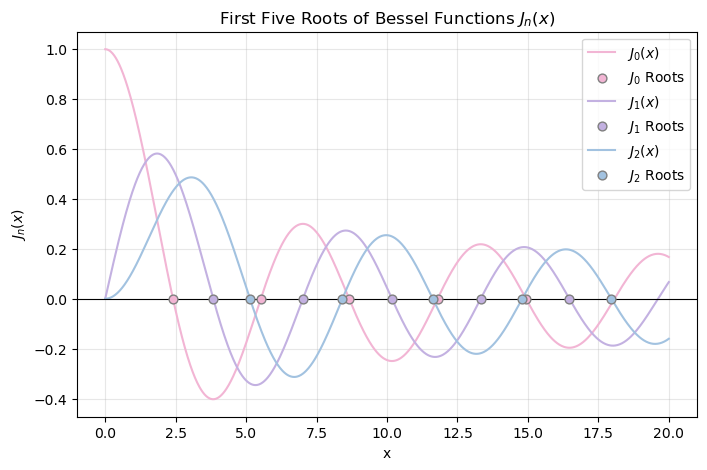

In [222]:
# plot bessel with roots
n=[0, 1, 2]
plt.figure(figsize=(8,5))
for i, order in enumerate(n):
    plt.plot(x, J_n(x, order), color=cute_colors[i], label=f'$J_{order}(x)$')
    plt.scatter(roots[order], np.zeros(5), color=cute_colors[i],
                edgecolor='0.5', zorder=5, s=40, label=f'$J_{order}$ Roots')

plt.axhline(0, color='k', linewidth=0.8)
plt.xlabel('x')
plt.ylabel('$J_n(x)$')
plt.title('First Five Roots of Bessel Functions $J_n(x)$')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
